# II. Programming and critical analysis

Recall the column_diagnosis.arff dataset from previous homeworks. For the following exercises,
normalize the data using sklearn’s MinMaxScaler

##### Import File

In [29]:
from scipy.io.arff import loadarff
import pandas as pd


# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
true_labels = df['class'].str.decode('utf-8')
#print(true_labels)

In [2]:
true_labels = df['class'].tolist()
print(true_labels)

['Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis', 

In [22]:
# Extract features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
y= df['class'].values

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'class' column
df['class_encoded'] = label_encoder.fit_transform(df['class'])

# Drop the original 'class' column if you don't need it
df = df.drop(columns=['class'])

In [13]:
# Normalize the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

df = df.drop(columns=['class'])

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

## 1)
Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with 𝑘 ∈ {2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of the produced solutions.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import completeness_score, homogeneity_score

# Initialize a list to store silhouette and purity scores for different k values
silhouette_scores = []
purity_scores = []

# Define a range of k values
k_values = [2, 3, 4, 5]

# Perform k-means clustering for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate purity
    # Assuming you have ground truth labels in a variable named 'true_labels'
    purity = completeness_score(true_labels, cluster_labels)
    purity_scores.append(purity)

# Print silhouette and purity scores for different k values
for k, silhouette, purity in zip(k_values, silhouette_scores, purity_scores):
    print(f'K={k}: \n\tSilhouette Score: {silhouette}\n\tPurity: {purity}\n\n')

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=2: 
	Silhouette Score: 0.36044124340441114
	Purity: 0.29577722395937595


K=3: 
	Silhouette Score: 0.29579055730002257
	Purity: 0.2664359179120822


K=4: 
	Silhouette Score: 0.27442402122340176
	Purity: 0.2269484730962197


K=5: 
	Silhouette Score: 0.23823928397844843
	Purity: 0.22679315915822995




/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 2)
Consider the application of PCA after the data normalization:  
    i. Identify the variability explained by the top two principal components.  
    ii. For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.

In [10]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
data_pca = pca.fit_transform(normalized_data)

explained_variance_ratio = pca.explained_variance_ratio_
variance_explained_by_top_two = np.sum(explained_variance_ratio[:2])
print(f"Variability explained by the top two principal components: {variance_explained_by_top_two:.2%}")

# Step 4: Sort the input variables by relevance based on absolute weights of the linear projection
# Get the loadings (weights) of the top two principal components
top_two_loadings = pca.components_[:2]

# Create a dictionary to store the absolute loadings and their corresponding variable names
loadings_dict = {f'PC{i+1}': abs(top_two_loadings[i]) for i in range(2)}
#variable_names = [f'{label}' for label in true_labels]
variable_names = [f'Variable {i}' for i in range(df.shape[1])]


# Sort variables by relevance for each principal component
sorted_variables = {
    f'PC{i+1}': [variable_names[j] for j in np.argsort(loadings_dict[f'PC{i+1}'])][::-1]
    for i in range(2)
}

# Print the sorted variables by relevance
for i in range(2):
    print(f"Top variables for PC{i+1} (by absolute weight): {', '.join(sorted_variables[f'PC{i+1}'])}")

Variability explained by the top two principal components: 77.14%
Top variables for PC1 (by absolute weight): Variable 0, Variable 2, Variable 1, Variable 3, Variable 5, Variable 4
Top variables for PC2 (by absolute weight): Variable 1, Variable 4, Variable 3, Variable 0, Variable 2, Variable 5


In [7]:
pca = PCA(n_components=2)
pca.fit(normalized_data)
explained_variance = pca.explained_variance_ratio_

print(f"Explained Variance of PC1: {explained_variance[0]}")
print(f"Explained Variance of PC2: {explained_variance[1]}")

Explained Variance of PC1: 0.5618144484299207
Explained Variance of PC2: 0.20955952591361918


In [6]:
import numpy as np

# Assuming 'X' is your normalized data
# Calculate the covariance matrix
cov_matrix = np.cov(normalized_data, rowvar=False)

# Perform PCA and obtain eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Calculate the explained variance for the top two components
explained_variance_ratio = (sorted_eigenvalues[0] + sorted_eigenvalues[1]) / np.sum(sorted_eigenvalues)

print("Explained Variance by the Top Two Principal Components:", explained_variance_ratio)

# Assuming you have already performed PCA and have eigenvectors in 'eigenvectors'
# Select the top two principal components
top_two_components = eigenvectors[:, :2]

# Sort input variables by relevance to the first principal component
sorted_indices_pc1 = np.argsort(np.abs(top_two_components[:, 0]))[::-1]
variables_sorted_by_relevance_pc1 = sorted_indices_pc1  # This will give you the indices of variables

# Sort input variables by relevance to the second principal component
sorted_indices_pc2 = np.argsort(np.abs(top_two_components[:, 1]))[::-1]
variables_sorted_by_relevance_pc2 = sorted_indices_pc2  # This will give you the indices of variables

# If you want the actual variable names, assuming 'X' is your data
variable_names = [f'Variable {i}' for i in range(df.shape[1])]

# Get the variable names sorted by relevance for the first principal component
variables_sorted_names_pc1 = [variable_names[i] for i in variables_sorted_by_relevance_pc1]

# Get the variable names sorted by relevance for the second principal component
variables_sorted_names_pc2 = [variable_names[i] for i in variables_sorted_by_relevance_pc2]

print("Variables sorted by relevance for the first principal component:")
print(variables_sorted_names_pc1)

print("Variables sorted by relevance for the second principal component:")
print(variables_sorted_names_pc2)

Explained Variance by the Top Two Principal Components: 0.77137397434354
Variables sorted by relevance for the first principal component:
['Variable 0', 'Variable 2', 'Variable 1', 'Variable 3', 'Variable 5', 'Variable 4']
Variables sorted by relevance for the second principal component:
['Variable 1', 'Variable 4', 'Variable 3', 'Variable 0', 'Variable 2', 'Variable 5']


In [10]:
import numpy as np
# Aplicar PCA ao conjunto de dados normalizado
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

# i. Variabilidade explicada pelos dois principais componentes
explained_variance = pca.explained_variance_ratio_
print(f'Variabilidade explicada pelos dois principais componentes: {explained_variance}')

# ii. Obter os pesos dos componentes principais
component_1_weights = pca.components_[0]
component_2_weights = pca.components_[1]

# Obter os índices das variáveis ordenadas por relevância nos dois componentes
component_1_sorted_indices = np.argsort(np.abs(component_1_weights))[::-1]
component_2_sorted_indices = np.argsort(np.abs(component_2_weights))[::-1]

# Obter os nomes das variáveis ordenadas por relevância nos dois componentes
input_variable_names = df.columns

component_1_sorted_variable_names = [input_variable_names[i] for i in component_1_sorted_indices]
component_2_sorted_variable_names = [input_variable_names[i] for i in component_2_sorted_indices]

# Imprimir as variáveis, PC weights e PC absolute weights nos dois componentes
print("Para o primeiro componente principal (PC1):")
for i, name in enumerate(component_1_sorted_variable_names):
    pc1_weight = component_1_weights[component_1_sorted_indices[i]]
    pc1_absolute_weight = np.abs(pc1_weight)
    print(f"Feature: {name}, PC Weight: {pc1_weight}, PC Absolute Weight: {pc1_absolute_weight}")

print("\nPara o segundo componente principal (PC2):")
for i, name in enumerate(component_2_sorted_variable_names):
    pc2_weight = component_2_weights[component_2_sorted_indices[i]]
    pc2_absolute_weight = np.abs(pc2_weight)
    print(f"Feature: {name}, PC Weight: {pc2_weight}, PC Absolute Weight: {pc2_absolute_weight}")

from tabulate import tabulate
pc1_data = []
for i, name in enumerate(component_1_sorted_variable_names):
    pc1_weight = component_1_weights[component_1_sorted_indices[i]]
    pc1_absolute_weight = np.abs(pc1_weight)
    pc1_data.append([name, pc1_weight, pc1_absolute_weight])

pc2_data = []
for i, name in enumerate(component_2_sorted_variable_names):
    pc2_weight = component_2_weights[component_2_sorted_indices[i]]
    pc2_absolute_weight = np.abs(pc2_weight)
    pc2_data.append([name, pc2_weight, pc2_absolute_weight])

# Imprimir os dados em tabelas
print("Tabela para o primeiro componente principal (PC1):")
print(tabulate(pc1_data, headers=["Feature", "PC Weight", "PC Absolute Weight"], tablefmt="pretty"))

print("\nTabela para o segundo componente principal (PC2):")
print(tabulate(pc2_data, headers=["Feature", "PC Weight", "PC Absolute Weight"], tablefmt="pretty"))

Variabilidade explicada pelos dois principais componentes: [0.56181445 0.20955953]
Para o primeiro componente principal (PC1):
Feature: pelvic_incidence, PC Weight: 0.5916206177372231, PC Absolute Weight: 0.5916206177372231
Feature: lumbar_lordosis_angle, PC Weight: 0.5150847620730923, PC Absolute Weight: 0.5150847620730923
Feature: pelvic_tilt, PC Weight: 0.4670394389672713, PC Absolute Weight: 0.4670394389672713
Feature: sacral_slope, PC Weight: 0.3256888625569193, PC Absolute Weight: 0.3256888625569193
Feature: degree_spondylolisthesis, PC Weight: 0.21692963450485395, PC Absolute Weight: 0.21692963450485395
Feature: pelvic_radius, PC Weight: -0.11582397626328882, PC Absolute Weight: 0.11582397626328882

Para o segundo componente principal (PC2):
Feature: pelvic_tilt, PC Weight: -0.6703727595553627, PC Absolute Weight: 0.6703727595553627
Feature: pelvic_radius, PC Weight: -0.581073837095359, PC Absolute Weight: 0.581073837095359
Feature: sacral_slope, PC Weight: 0.4433029949470748, P

In [9]:
!pip install tabulate


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## 3)
Visualize side-by-side the data using: i) the ground diagnoses, and ii) the previously learned 𝑘 = 3 clustering solution. To this end, projected the normalized data onto a 2-dimensional data space using PCA and then color observations using the reference and cluster annotations.

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_389759/3684736150.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


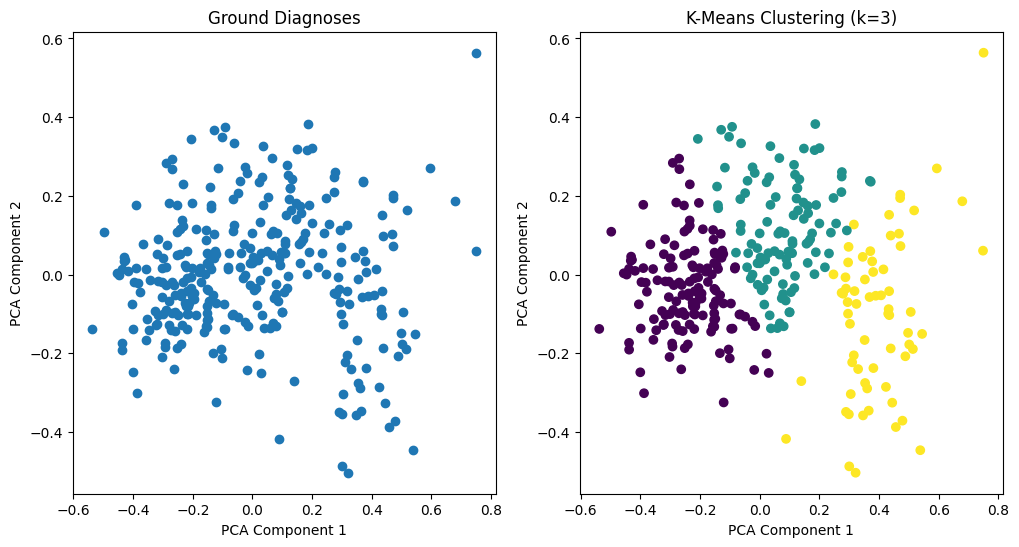

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(normalized_data)
#X_pca_labels = pca.fit_predict(normalized_data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_data)

# Create a scatter plot for the ground diagnoses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title("Ground Diagnoses")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Assuming you have the clustering results in the variable 'kmeans_labels'
# Create a scatter plot for the clustering solution
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()


## 4)
Considering the results from questions (1) and (3), identify two ways on how clustering can
be used to characterize the population of ill and healthy individuals.